# Title

## Description

Description

## References

### External links
- [Classification with pycaret](https://www.pycaret.org/tutorials/html/CLF101.html)

### Related notebooks
- [Some notebook](some_notebook.ipynb)
 

# Set up

## import

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import *

from pycaret.classification import *

## local import

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.data_source.spreadsheet import Spreadsheet
from src.preprocessing._preprocessing import Preprocessing

# Loading data

In [4]:
filename = 'train.csv'
dataset = Spreadsheet().get_data(f'../data/raw/{filename}')

# Preprocessing

In [5]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (846, 4)
Unseen Data For Predictions: (45, 4)


# Training

In [6]:
features = [
    'Age',
    'Sex',
    'Pclass',
]
target = 'Survived'

In [7]:
exp_clf = setup(
    data = data,
    target = target,
    silent=True
)

,Description,Value
0,session_id,5677
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(846, 4)"
5,Missing Values,1
6,Numeric Features,1
7,Categorical Features,2
8,Ordinal Features,0
9,High Cardinality Features,0


In [8]:
best_model = compare_models(n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8242,0.8333,0.7269,0.7974,0.7569,0.6199,0.6250,0.0930
gbc,Gradient Boosting Classifier,0.8226,0.8780,0.7267,0.7950,0.7541,0.6162,0.6227,0.0370
lightgbm,Light Gradient Boosting Machine,0.8192,0.8665,0.7136,0.7919,0.7483,0.6080,0.6122,0.0180
dt,Decision Tree Classifier,0.8175,0.8128,0.7132,0.7915,0.7462,0.6045,0.6104,0.0060
rf,Random Forest Classifier,0.8141,0.8563,0.7267,0.7763,0.7468,0.6004,0.6049,0.0960
catboost,CatBoost Classifier,0.8141,0.8748,0.7134,0.7825,0.7416,0.5973,0.6032,0.2600
ada,Ada Boost Classifier,0.7973,0.8408,0.7364,0.7384,0.7339,0.5705,0.5741,0.0340
ridge,Ridge Classifier,0.7838,0.0000,0.6783,0.7441,0.7054,0.5352,0.5406,0.0060
lda,Linear Discriminant Analysis,0.7838,0.8431,0.6828,0.7414,0.7065,0.5359,0.5412,0.0060
lr,Logistic Regression,0.7804,0.8433,0.6919,0.7289,0.7062,0.5313,0.5354,0.3150


In [9]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.9189,0.5217,0.9231,0.6667,0.5391,0.5838
1,0.7667,0.8672,0.3913,1.0000,0.5625,0.4422,0.5328
2,0.7966,0.8698,0.5000,0.9167,0.6471,0.5210,0.5682
3,0.7966,0.8342,0.5455,0.8571,0.6667,0.5305,0.5586
4,0.7458,0.9177,0.3182,1.0000,0.4828,0.3692,0.4758
5,0.7119,0.8047,0.3182,0.7778,0.4516,0.3001,0.3552
6,0.8475,0.9171,0.7273,0.8421,0.7805,0.6646,0.6688
7,0.8475,0.8557,0.5909,1.0000,0.7429,0.6443,0.6894
8,0.8305,0.9149,0.6087,0.9333,0.7368,0.6198,0.6507
9,0.7458,0.8303,0.6087,0.7000,0.6512,0.4527,0.4554


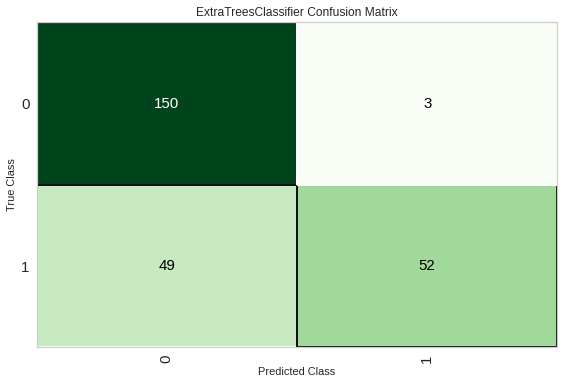

In [10]:
plot_model(tuned_model, plot = 'confusion_matrix')

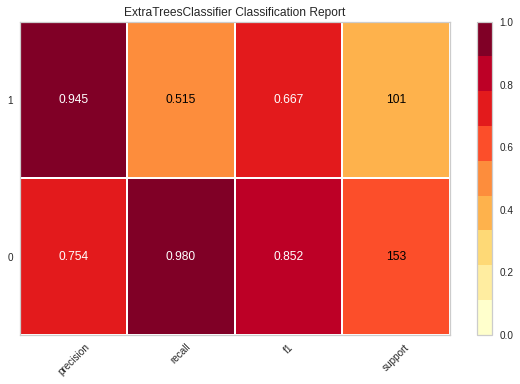

In [11]:
plot_model(tuned_model, plot = 'class_report')

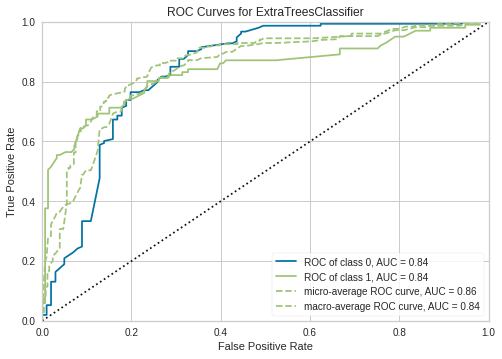

In [12]:
plot_model(tuned_model, plot = 'auc')

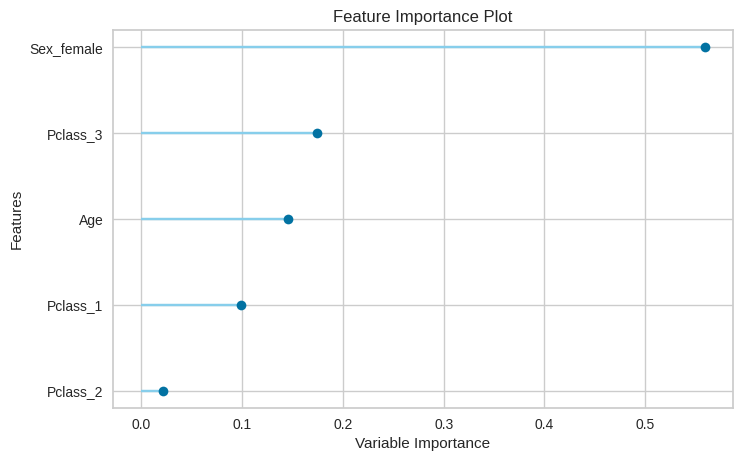

In [13]:
plot_model(tuned_model, plot='feature')